In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
# Now you can print the dataset information
# Print the first 5 rows of the dataset
print("First 5 rows of the Iris dataset:\n", df.head())

# Print the feature names
print("\nFeature names:", iris.feature_names)

# Print the target names (species)
print("\nTarget names (species):", iris.target_names)

First 5 rows of the Iris dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names (species): ['setosa' 'versicolor' 'virginica']


In [4]:
# Separate data by species
setosa_data = df[df['target'] == 0]
versicolor_data = df[df['target'] == 1]
virginica_data = df[df['target'] == 2]

In [5]:
# Randomly select samples for training
train_setosa = setosa_data.sample(n=15, random_state=42)
train_virginica = virginica_data.sample(n=15, random_state=42)
train_df = pd.concat([train_setosa, train_virginica])
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

In [6]:
# Randomly select samples for testing
test_setosa = setosa_data.drop(train_setosa.index).sample(n=3, random_state=42)
test_virginica = virginica_data.drop(train_virginica.index).sample(n=3, random_state=42)
test_versicolor = versicolor_data.sample(n=2, random_state=42)

In [7]:
# Combine test samples
test_df = pd.concat([test_setosa, test_virginica, test_versicolor])
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

In [8]:
# Choose the value of K
k = 3

In [9]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

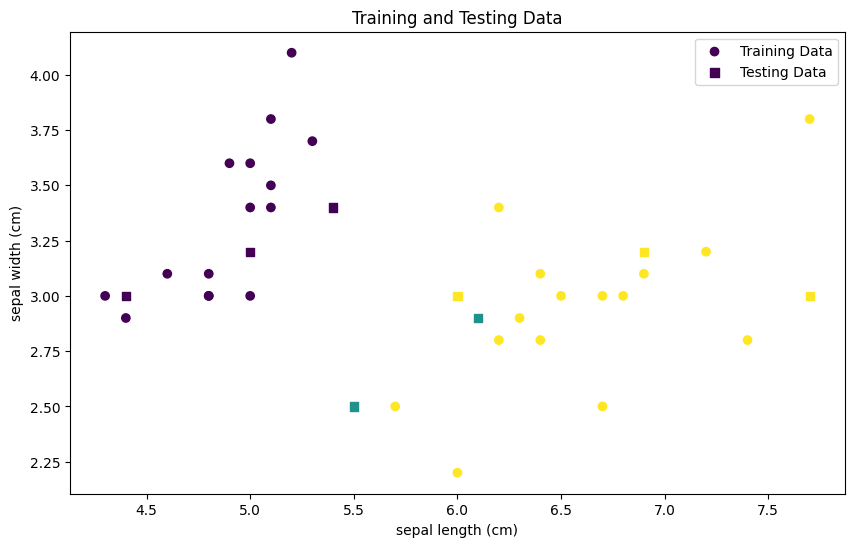

In [11]:
# --- Plotting the training and testing data ---
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, marker='o', label='Training Data')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='s', label='Testing Data')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Training and Testing Data')
plt.legend()
plt.show()  # This will display the plot in Jupyter Lab

In [12]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.75
Precision: 0.60
Recall: 0.75
F1-score: 0.66


C:\Users\Tanishq Katna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


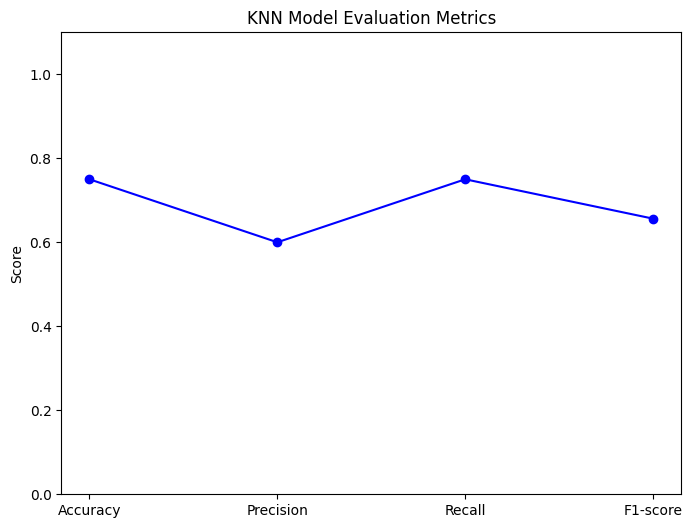

In [13]:
# --- Plot the evaluation metrics ---
# Create lists for metric names and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='blue')
plt.ylim(0, 1.1)
plt.title('KNN Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()  # This will display the plot in Jupyter Lab

In [14]:
# --- Confusion Matrix ---
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[3 0 0]
 [0 0 2]
 [0 0 3]]
